# Чтение данных

Импорт необходимых библиотек

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score


import tensorflow as tf
tf.set_random_seed(1)


# Беглый взгляд на данные

In [2]:
df_train = pd.read_csv('train_sample.csv')
df_test = pd.read_csv('test_sample.csv')

print(df_train.columns)
df_train.head()

Index(['system:index', 'NDSI', 'NDVI', 'NDWI', 'RND', 'blue', 'currentDate',
       'date', 'dayNumber', 'green', 'name', 'nir', 'randomDayNum',
       'realmed_NDSI', 'realmed_NDVI', 'realmed_NDWI', 'realmed_blue',
       'realmed_green', 'realmed_nir', 'realmed_red', 'realmed_swir1',
       'realmed_swir2', 'red', 'swir1', 'swir2', 'tmpDayRND', 'tmpYearRND',
       'tree_canopy_cover', 'uncertainty', '.geo'],
      dtype='object')


system:index      NDSI      NDVI  \
0  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_0  0.412171  0.406655   
1  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_1  0.460697  0.474908   
2  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_2  0.276366  0.289328   
3  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_3  0.453246  0.456599   
4  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_4  0.291562  0.291867   

           NDWI       RND      blue  currentDate     date  dayNumber  \
0  1.000000e-09  0.179016  0.007979      16216.0  16216.0   0.353425   
1  1.000000e-09  0.179016  0.014466      16216.0  16216.0   0.353425   
2  1.000000e-09  0.179016  0.008874      16216.0  16216.0   0.353425   
3  1.000000e-09  0.179016  0.014272      16216.0  16216.0   0.353425   
4  1.000000e-09  0.179016  0.010315      16216.0  16216.0   0.353425   

      green  ...  realmed_swir1  realmed_swir2       red     swir1     swir2  \
0  0.031681  ...        0.17230         0.0837  0.027268  0.147547  0.090581   
1  0.041071  ...        0.18120         0.0837  0.034223  0.180658  0.108788   
2  0.024566  ...        0.17130         0.0744  0.020146  0.107605  0.064560   
3  0.040784  ...        0.23100         0.1197  0.036140  0.185298  0.113715   
4  0.026654  ...        0.22815         0.1173  0.023413  0.123722  0.074249   

   tmpDayRND  tmpYearRND  tree_canopy_cover  uncertainty  .geo  
0   0.426319    0.400438               0.54     0.177851   NaN  
1   0.426319    0.400438               0.67     0.178055   NaN  
2   0.426319    0.400438               0.58     0.175930   NaN  
3   0.426319    0.400438               0.19     0.182277   NaN  
4   0.426319    0.400438               0.27     0.187987   NaN  

[5 rows x 30 columns]

In [3]:
band_names = ['swir2','swir1','nir','red','green','blue', 'NDVI', 'NDSI', 'NDWI']
real_band_names = ['realmed_'+n for n in band_names]

names = ['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover'] + band_names + real_band_names
print(names)

df_train = df_train[names]
df_test = df_test[names]
df_test.head()

['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']


system:index    name     date  \
0  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_0  Change  16224.0   
1  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_1  Change  16224.0   
2  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_2  Change  16224.0   
3  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_3  Change  16224.0   
4  1_0000e646f958cf61d67c_1_0000e646f958cf61d67c_0  Change  16833.0   

   dayNumber  tree_canopy_cover     swir2     swir1       nir       red  \
0   0.375342               0.59  0.085401  0.149670  0.228706  0.028008   
1   0.375342               0.53  0.086260  0.161994  0.269452  0.027812   
2   0.375342               0.57  0.048561  0.089311  0.135357  0.013309   
3   0.375342               0.57  0.079334  0.147269  0.233749  0.022649   
4   0.043836               0.63  0.049153  0.044575  0.189150  0.115988   

      green      ...               NDWI  realmed_swir2  realmed_swir1  \
0  0.038474      ...       1.000000e-09         0.0868        0.17030   
1  0.043424      ...       1.000000e-09         0.0706        0.16570   
2  0.019923      ...       1.000000e-09         0.0744        0.16870   
3  0.033519      ...       1.000000e-09         0.0756        0.17620   
4  0.115733      ...       1.000000e-09         0.1007        0.09395   

   realmed_nir  realmed_red  realmed_green  realmed_blue  realmed_NDVI  \
0      0.35960      0.04510        0.06800        0.0251      0.777119   
1      0.42310      0.03220        0.06670        0.0220      0.858555   
2      0.40110      0.03230        0.06380        0.0240      0.850946   
3      0.45200      0.03210        0.06680        0.0235      0.867383   
4      0.44905      0.38225        0.36205        0.3528      0.078459   

   realmed_NDSI  realmed_NDWI  
0  5.812442e-01  1.000000e-09  
1  6.745831e-01  1.000000e-09  
2  6.786070e-01  1.000000e-09  
3  6.917907e-01  1.000000e-09  
4  1.000000e-09  1.000000e-09  

[5 rows x 23 columns]

In [4]:
changes = df_train.loc[df_train['date'] > 0 ]
no_changes = df_train.loc[df_train['date'] == -1]

print(df_train.shape)
print(changes.shape)
print(no_changes.shape)


print()
changes1 = df_test.loc[df_test['date'] > 0 ]
no_changes1 = df_test.loc[df_test['date'] == -1]

print(df_test.shape)
print(changes1.shape)
print(no_changes1.shape)


(34564, 23)
(3730, 23)
(30834, 23)

(15196, 23)
(1993, 23)
(13203, 23)


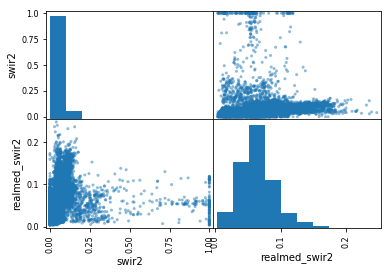

In [5]:
_ = pd.plotting.scatter_matrix(no_changes[['swir2', 'realmed_swir2']], marker='.')

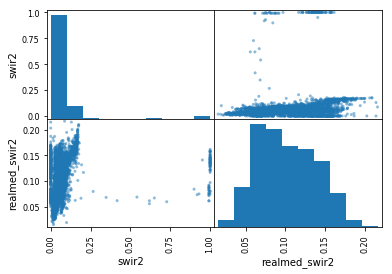

In [6]:
_ = pd.plotting.scatter_matrix(changes[['swir2', 'realmed_swir2']], marker='.')

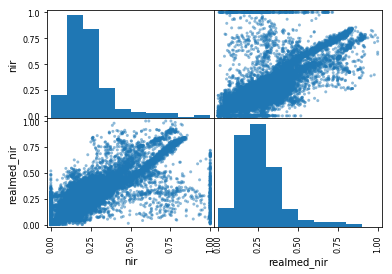

In [7]:
_ = pd.plotting.scatter_matrix(no_changes[['nir', 'realmed_nir']], marker='.')

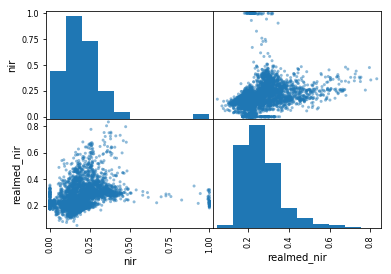

In [8]:
_ = pd.plotting.scatter_matrix(changes[['nir', 'realmed_nir']], marker='.')

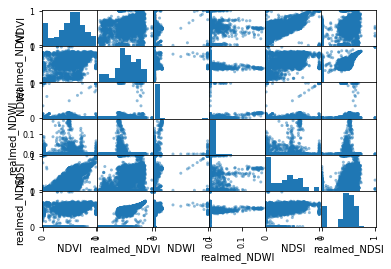

In [9]:
_ = pd.plotting.scatter_matrix(changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

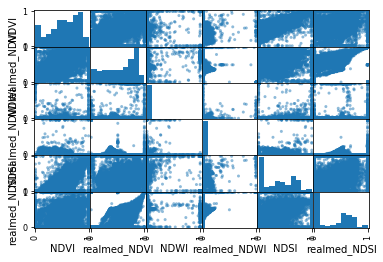

In [10]:
_ = pd.plotting.scatter_matrix(no_changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

# Предобработка обучающего и тестового множеств

In [11]:
# Все завязано на конкретный формат файла. При необходимости - менять функцию
def prepare_data(data):
    # ['system:index', 'name', 'date', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']

    
    bands = [
        'swir2', 'swir1', 'nir', 'red', 'green', 'blue',
        'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue'
    ]
    
    indices = [
        'NDVI', 'NDSI', 'NDWI', 
        'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI'
    ]
    
    inputs = bands + indices
    
        
    # В system:index содержится ID полигона (у нас много точек на полигон), чтобы избежать оптимистичной оценки из-за автокорреляции
    # выделим номер полигона и сохраним
    data['system:index'] = data['system:index'].str.extract(r'(.+)_\d+$')
    
    data['change'] = (data['name'] == 'Change').astype(int)

    
    addons = ['system:index', 'dayNumber', 'tree_canopy_cover', 'change']
    # addons = ['system:index', 'change']
        
    # names = set(inputs) - set(['name'])
    names = inputs + addons
    print(names)
    return data[names]
  



In [12]:
train_data = prepare_data(df_train.copy())
test_data = prepare_data(df_test.copy())

train_data.head()

['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']
['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']


swir2     swir1       nir       red     green      blue  realmed_swir2  \
0  0.090581  0.147547  0.181833  0.027268  0.031681  0.007979         0.0837   
1  0.108788  0.180658  0.226369  0.034223  0.041071  0.014466         0.0837   
2  0.064560  0.107605  0.138718  0.020146  0.024566  0.008874         0.0744   
3  0.113715  0.185298  0.221983  0.036140  0.040784  0.014272         0.1197   
4  0.074249  0.123722  0.148481  0.023413  0.026654  0.010315         0.1173   

   realmed_swir1  realmed_nir  realmed_red   ...        NDVI      NDSI  \
0        0.17230       0.3801      0.04780   ...    0.406655  0.412171   
1        0.18120       0.4200      0.03770   ...    0.474908  0.460697   
2        0.17130       0.4243      0.03350   ...    0.289328  0.276366   
3        0.23100       0.4489      0.05950   ...    0.456599  0.453246   
4        0.22815       0.4547      0.05175   ...    0.291867  0.291562   

           NDWI  realmed_NDVI  realmed_NDSI  realmed_NDWI  \
0  1.000000e-09      0.776583      0.565652  1.000000e-09   
1  1.000000e-09      0.835263      0.655550  1.000000e-09   
2  1.000000e-09      0.853648      0.672852  1.000000e-09   
3  1.000000e-09      0.766783      0.591216  1.000000e-09   
4  1.000000e-09      0.797841      0.634916  1.000000e-09   

                                    system:index  dayNumber tree_canopy_cover  \
0  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.54   
1  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.67   
2  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.58   
3  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.19   
4  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.27   

   change  
0       1  
1       1  
2       1  
3       1  
4       1  

[5 rows x 22 columns]

In [13]:
def split_data(data, train_val_test=0.66, group='system:index'):
  np.random.seed(1)
  ids = set(data[group])
  count = len(ids)
  print('Found %s unique areas' % (count))

  train_count = int(count * train_val_test)
  
  train = np.random.choice(list(ids), train_count, False)

  val_ids = ids.difference(set(train))
  val = np.array(list(val_ids))
  
  train = data[data[group].isin(train)]
  val = data[data[group].isin(val)]
  
  train = np.array(train.drop(labels=[group], axis=1))
  val = np.array(val.drop(labels=[group], axis=1))

  return train, val
  

# Обучение модели

In [14]:
def get_batch(data, size, input_count):
    batch = data[np.random.randint(data.shape[0], size=size), :]

    # add a little of noise
    errors = np.random.uniform(low=-0.0001, high=0.0001, size=(size, input_count))
    x = batch[:, :input_count]
    x += + errors
    

    y = batch[:, input_count:]
    
    return x, y
 

In [15]:
def print_model(x_test, y_test):
    model_dir = '.'
    result_filename_prefix = 'res_'
    
    """   
    inference_graph = tf.Graph()
    with tf.Session(graph=inference_graph) as sess:
        loader = tf.train.import_meta_graph(os.path.join(model_dir, model_name+".meta"))
        loader.restore(sess, os.path.join(model_dir, model_name))

        # x = tf.placeholder(tf.float32, [None, input_count])
        # y_ = tf.placeholder(tf.int32, [None, out_count])

        _loss = inference_graph.get_tensor_by_name('loss:0')
        _loss1 = inference_graph.get_tensor_by_name('loss1:0')
        _x = inference_graph.get_tensor_by_name('input:0')
        _y = inference_graph.get_tensor_by_name('target:0')

        _W1 = inference_graph.get_tensor_by_name('weights/w1:0')
        _W2 = inference_graph.get_tensor_by_name('weights/w2:0')
        _W3 = inference_graph.get_tensor_by_name('weights/w3:0')

        _b1 = inference_graph.get_tensor_by_name('biases/b1:0')
        _b2 = inference_graph.get_tensor_by_name('biases/b2:0')
        _b3 = inference_graph.get_tensor_by_name('biases/b3:0')



        print('test ACC:\t', sess.run(_loss, feed_dict={_x: x_test,_y: y_test}))
        print('test ACC1:\t', sess.run(_loss1, feed_dict={_x: x_test,_y: y_test}))
    """
    
    print('test ACC:\t', sess.run(loss, feed_dict={x: x_test, y_: y_test}))
    print('test ACC1:\t', sess.run(loss1, feed_dict={x: x_test, y_: y_test}))

    bestW1, bestW2, bestW3, bestB1, bestB2, bestB3 = sess.run([W1, W2, W3, b1, b2, b3])

    os.makedirs(model_dir, exist_ok=True)
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w1.txt'), bestW1, delimiter=', ', newline='],\n[', header='[\n', footer='', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b1.txt'), bestB1, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w2.txt'), bestW2, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b2.txt'), bestB2, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w3.txt'), bestW3, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b3.txt'), bestB3, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')




In [16]:
def model(x, W1, W2, W3, b1, b2, b3):
    # tf.summary.histogram('w3', W3)
    # tf.summary.histogram('b3', b3)

    l1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    # tf.summary.histogram('l1', l1)

    l2 = tf.nn.relu(tf.matmul(l1, W2) + b2)
    # tf.summary.histogram('l2', l2)

    l3_logits = tf.matmul(l2, W3) + b3
    # tf.summary.histogram('l3_logits', l3_logits)

    return l3_logits

In [17]:
test = np.array(test_data.drop(labels=['system:index'], axis=1))
test = np.float32(test)


train, val = split_data(train_data.copy())

Found 431 unique areas


In [27]:
layer1 = 10
layer2 = 5

summaries_dir = '.'
model_dir = '.'
max_epoch = 10000


out_count = 1
input_count = train.shape[1] - out_count


x = tf.placeholder(tf.float32, [None, input_count], name='input')

with tf.name_scope('weights'):
    W1 = tf.Variable(tf.truncated_normal([input_count, layer1], stddev=0.5), name='w1')
    W2 = tf.Variable(tf.truncated_normal([layer1, layer2], stddev=0.5), name='w2')
    W3 = tf.Variable(tf.truncated_normal([layer2, out_count], stddev=0.5), name='w3')

with tf.name_scope('biases'):
    b1 = tf.Variable(tf.zeros([layer1]), name='b1')
    b2 = tf.Variable(tf.zeros([layer2]), name='b2')
    b3 = tf.Variable(tf.zeros([out_count]), name='b3')

logits = model(x, W1, W2, W3, b1, b2, b3)
y = tf.sigmoid(logits, name='result')


# Define loss and optimizer
y_ = tf.placeholder(tf.int32, [None, out_count], name='target')

loss1 = tf.reduce_mean(
    # tf.losses.absolute_difference(labels=y_, predictions=y), name='loss1')
    tf.losses.mean_squared_error(labels=y_, predictions=y), name='loss1')


reg_w = 0.000001
loss = tf.reduce_mean(
    # tf.losses.sparse_softmax_cross_entropy(labels=[y_], logits=[tf.transpose([-logits, logits])]) +
    loss1 + reg_w*(tf.nn.l2_loss(W1)+tf.nn.l2_loss(W2)+tf.nn.l2_loss(W3)),
    name='loss'
)


optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
optimizer = optimizer.minimize(loss)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()
# Train
best_loss = 9999999999999
for epoch in range(max_epoch):
    batch_xs, batch_ys = get_batch(train, 2**16, input_count)
    
    _, train_loss, train_loss1 = sess.run(
        [optimizer, loss, loss1], feed_dict={x: batch_xs, y_: batch_ys}
    )
    
    # Test trained model
    if epoch % 100 == 99:
        val_loss = sess.run(loss, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]})
        print('EPOCH', epoch+1, '\tVal Loss =', val_loss, 'Loss1: \tval', sess.run(loss1, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]}), '\ttrain', train_loss1)

        if val_loss < best_loss:
            best_loss = val_loss

          
print('Best val LOSS:', best_loss)
test_loss, test_loss1 = sess.run(
        [loss, loss1], feed_dict={x: test[:, :input_count], y_: test[:, input_count:]})

print('Test Loss1 =', test_loss1, 'Test Loss =', test_loss)

print_model(test[:, :input_count], test[:, input_count:])


y_pred_vec = sess.run(y, feed_dict={x: val[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = val[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Val')
print(pd.DataFrame(conf_mat))

print('VAL AUC:',roc_auc_score(y_true_vec, y_pred_vec))


y_pred_vec = sess.run(y, feed_dict={x: test[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = test[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Test')
print(pd.DataFrame(conf_mat))

print('Test AUC:', roc_auc_score(y_true_vec, y_pred_vec))

EPOCH 100 	Val Loss = 0.11048144 Loss1: 	val 0.110454954 	train 0.08204475
EPOCH 200 	Val Loss = 0.096614696 Loss1: 	val 0.09658328 	train 0.06869335
EPOCH 300 	Val Loss = 0.08944112 Loss1: 	val 0.08940157 	train 0.05961155
EPOCH 400 	Val Loss = 0.0853855 Loss1: 	val 0.08533161 	train 0.049471125
EPOCH 500 	Val Loss = 0.08654121 Loss1: 	val 0.08647609 	train 0.044644862
EPOCH 600 	Val Loss = 0.08242829 Loss1: 	val 0.082348324 	train 0.03775304
EPOCH 700 	Val Loss = 0.07704357 Loss1: 	val 0.076949984 	train 0.03423425
EPOCH 800 	Val Loss = 0.072460756 Loss1: 	val 0.07235034 	train 0.031361658
EPOCH 900 	Val Loss = 0.06763113 Loss1: 	val 0.067506194 	train 0.028866023
EPOCH 1000 	Val Loss = 0.06734837 Loss1: 	val 0.0672115 	train 0.027595209
EPOCH 1100 	Val Loss = 0.06639308 Loss1: 	val 0.06624671 	train 0.027428221
EPOCH 1200 	Val Loss = 0.06733894 Loss1: 	val 0.06718465 	train 0.027458215
EPOCH 1300 	Val Loss = 0.067184664 Loss1: 	val 0.06702372 	train 0.026890853
EPOCH 1400 	Val Loss 

In [28]:
print('Test AUC:',roc_auc_score(y_true_vec, y_pred_vec))

Test AUC: 0.8468827254551727


In [35]:
tmp = 2*np.random.uniform(size=20) - 1
print(repr(tmp))

sess.run(y, feed_dict={x: tmp.reshape((-1, 20))})

array([-0.47545262,  0.12627156,  0.98912266, -0.93510151, -0.75550579,
       -0.9554928 ,  0.94319593, -0.25718119,  0.0500781 ,  0.83880068,
        0.62566131, -0.18519368,  0.32906426, -0.03985521,  0.44274818,
        0.2556768 , -0.57860006, -0.24703635,  0.09041049, -0.58719076])


array([[0.9999851]], dtype=float32)